In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

In [74]:
with open('Results/expsmootEndog.npy','rb') as f:
    data = np.load(f)
x = data.squeeze()

In [75]:
smoothing_level = 0.02242732830031289
smoothing_trend = None
smoothing_seasonal = 4.93552304628974e-08
damping_trend = None
initial_level =0.7360047690491268
initial_trend =None
initial_seasons = [-0.61733107, -0.62938417, -0.62722512,  0.80063055, -0.29192828,
        -0.57103026, -0.56761676, -0.48905939,  0.14003335,  1.40010126,
         0.58676564, -0.22433257, -0.61404854, -0.62983029, -0.62845976,
         0.60991498, -0.26795383, -0.519875  , -0.50052507, -0.4456927 ,
         0.27700506,  1.54605526,  0.56673454, -0.30492657, -0.60546233,
        -0.63005357, -0.62554879,  0.56411956, -0.24986267, -0.44443702,
        -0.45150611, -0.38137487,  0.23363538,  1.31291845,  0.51956564,
        -0.18239232, -0.62723698, -0.62871455, -0.61882172,  0.21556779,
         0.7707258 ,  1.98389018,  0.65294392,  0.93290497,  0.40393486,
         0.6433563 ,  0.29817115, -0.28370082, -0.62885701, -0.63079478,
        -0.62002564,  0.04816734,  0.68313293,  0.8486591 ,  0.50789389,
         0.816992  ,  0.26763765,  0.8075894 ,  0.27409654, -0.30507274,
        -0.60981831, -0.6308351 , -0.62524503,  0.69708505, -0.29682969,
        -0.47232816, -0.5328117 , -0.46836094,  0.05233298,  1.27190546,
         0.54102603, -0.33705982, -0.62428996, -0.63033953, -0.62677815,
         0.58767786, -0.36902816, -0.53579927, -0.55965168, -0.49602453,
         0.24346845,  1.35853332,  0.47798489, -0.26064737]
use_boxcox =False
lamda =None
remove_bias =False

In [4]:

alpha = smoothing_level
beta = smoothing_trend
gamma = smoothing_seasonal
phi = damping_trend

h = 100

m = 12*7
phi =  1.0
beta = 0

In [73]:
#OG wervision
def OGf(alpha, beta, gamma,phi,initial_level,initial_trend,initial_seasons, h, m):
    x = data.squeeze()

    alphac = 1 - alpha
    betac = 1 - beta if beta is not None else 0
    gammac = 1 - gamma if gamma is not None else 0

    s = np.zeros((len(data) + h + 1,))
    b = np.zeros((len(data) + h + 1,))
    c = np.zeros((len(data) + h + m + 1,))

    s[0] = initial_level
    b[0] = 0#initial_trend
    c[:m] = initial_seasons
    phi_h = np.cumsum(phi ** np.arange(1, h + 1 + 1))

    nobs = len(data)

    for i in range(1, nobs + 1):
        s[i] = alpha * (x[i - 1] - c[i - 1]) + alphac * (s[i - 1] + b[i - 1]*phi)
        b[i] = beta * (s[i] - s[i - 1]) + (betac * b[i - 1] * phi)
        c[i + m - 1] = gamma * (x[i - 1] - gamma * (s[i - 1] + b[i - 1] * phi)) + (gammac * c[i - 1])
        
    s[nobs:] = s[nobs] #all from nobs = to last value
    # if has_trend:
    b[:nobs] = b[:nobs] * phi
    b[nobs:] = b[nobs] * phi_h
    trend = s + b
    c[nobs + m - 1 :] = [
        c[(nobs - 1) + j % m] for j in range(h + 1 + 1)
    ]

    fitted = trend + c[:-m]
    return fitted

In [83]:
# No s Array
alpha = smoothing_level
beta = smoothing_trend
gamma = smoothing_seasonal
phi = damping_trend

h = 100

m = 12*7
phi =  1.1
beta = 0

x = data.squeeze()


alphac = 1 - alpha
betac = 1 - beta if beta is not None else 0
gammac = 1 - gamma if gamma is not None else 0

# s = np.zeros((len(data) + h + 1,))
# s[0] = initial_level
b = np.zeros((len(data) + h + 1,))
c = np.zeros((len(data) + h + m + 1,))

s = [initial_level, 0]
b[0] = initial_trend if initial_trend is not None else 0
c[:m] = initial_seasons
phi_h = np.cumsum(phi ** np.arange(1, h + 1 + 1))

nobs = len(data)

for i in range(1, nobs + 1):
    s[1] = alpha * (x[i - 1] - c[i - 1]) + alphac * (s[0] + b[i - 1]*phi)
    b[i] = beta * (s[1] - s[0]) + (betac * b[i - 1] * phi)
    c[i + m - 1] = gamma * (x[i - 1] - gamma * (s[0] + b[i - 1] * phi)) + (gammac * c[i - 1])

    s[0] = s[1]
    
# s[nobs:] = s[nobs] #all from nobs = to last value
# if has_trend:
b[:nobs] = b[:nobs] * phi
b[nobs:] = b[nobs] * phi_h
trend = s[1] + b
c[nobs + m - 1 :] = [ c[(nobs - 1) + j % m] for j in range(h + 1 + 1)]

fitted = trend + c[:-m]

In [6]:
def predFeature(x, h, m, alpha, beta, gamma, initial_level, initial_trend, initial_seasons):
    alphac = 1 - alpha
    betac = 1 - beta if beta is not None else 0
    gammac = 1 - gamma if gamma is not None else 0

    # s = np.zeros((len(data) + h + 1,))
    # s[0] = initial_level
    b = np.zeros((len(data) + h + 1,))
    c = np.zeros((len(data) + h + m + 1,))

    s = [initial_level, 0]
    b[0] = initial_trend if initial_trend is not None else 0
    c[:m] = initial_seasons

    nobs = len(x)

    for i in range(1, nobs + 1):
        s[1] = alpha * (x[i - 1] - c[i - 1]) + alphac * (s[0] + b[i - 1])
        b[i] = beta * (s[1] - s[0]) + (betac * b[i - 1])
        c[i + m - 1] = gamma * (x[i - 1] - gamma * (s[0] + b[i - 1])) + (gammac * c[i - 1])

        s[0] = s[1]
        
    fitted = np.zeros(h)
    for i in range(h):
        fitted[i] = s[1] + i*b[nobs + 1] + c[nobs + 2 - m + (i - 1) % m]

    return fitted, s[1], b[nobs+1], c[(nobs + 2 - m):(nobs + 2 - m) + m]
    

In [94]:
class ExpPred:
    def __init__(self, alpha, beta, gamma, s0, b0, c0, L, pred_n):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.s = [s0,0]
        self.b = [b0,0]
        self.c = c0
        self.L = L
        self.pred_n = pred_n
        self.alphac = 1 - alpha
        self.betac = 1 - beta
        self.gammac = 1 - gamma
        self.i = 0
    
    def next(self, x):
        self.s[1] = self.alpha * (x - self.c[self.i % self.L]) + self.alphac * (self.s[0] + b[0])
        self.b[1] = self.beta * (self.s[1] - self.s[0]) + (self.betac * self.b[0])

        predicted = self.s[1] + self.pred_n*self.b[1] + self.c[(self.i + self.pred_n) % self.L]

        self.c[self.i % self.L] = self.gamma * (x - self.gamma * (self.s[0] + self.b[0] )) + (self.gammac * self.c[self.i % self.L])
        
        self.i += 1
        self.s[0] = self.s[1]
        self.b[0] = self.b[1]

        return predicted


In [54]:
def predFeatureNoPre(start,end, L, st, bt, ct):
    fitted = np.zeros(end-start)
    for m in range(start,end):
        fitted[m-start] = st + m*bt + ct[(m - 1) % L]

    # fitted = [st + m*bt + ct[(m - 1) % L] for m in range(h)]
    return fitted

In [82]:
def f(x,phi):
    return phi*(1+x)

## Tests

In [92]:
# Fiting for starting params only alfa beta gama i phi to choose
h = 100
m = 12*7
A = np.mean(x[:-(len(x) % m)].reshape(-1,m),axis=1)
s0 = [np.mean(x[np.arange(len(x)) % m == i][:len(A)]-A) for i in range(m)]
b0 = ((x[m:m+m] - x[:m]) / m).mean()
b0 = 0

In [118]:
ep = ExpPred(alpha,beta,gamma,0.7360047690491268,b0,s0,12*7,16)

pp = np.zeros(3000)
for i in range(3000):
    pp[i] = ep.next(x[i+1])

In [50]:
s0 = np.array(s0,dtype='f4')
print('extern const float s0[] = { \n\t', end='')
for i,c in enumerate(s0):
    e = ', ' if i != len(s0) - 1 else '\n };'
    print(c,end=e)
    if((i - 5) % 6 == 0): print('',end='\n\t')

extern const float s0[] = { 
	-0.61868787, -0.63112617, -0.6288982, 0.7989203, -0.29133618, -0.5712235, 
	-0.56782633, -0.48917946, 0.14371578, 1.4119769, 0.5848501, -0.222511, 
	-0.6144541, -0.63040143, -0.6290988, 0.610601, -0.26832828, -0.52023685, 
	-0.500894, -0.44605428, 0.2766341, 1.5456675, 0.5663487, -0.3052936, 
	-0.6058487, -0.6304511, -0.6259649, 0.56370854, -0.25028253, -0.4448789, 
	-0.45197272, -0.38180232, 0.2331809, 1.3124765, 0.5191269, -0.18281664, 
	-0.62766093, -0.6291413, -0.61925834, 0.21512394, 0.7702573, 1.9834408, 
	0.6524995, 0.93243504, 0.40343934, 0.6428404, 0.29767224, -0.28419408, 
	-0.62933445, -0.63127106, -0.6204825, 0.047719304, 0.6826208, 0.8481693, 
	0.50739336, 0.8165313, 0.26716548, 0.8070694, 0.2735791, -0.30557472, 
	-0.610341, -0.63134825, -0.62576663, 0.6965652, -0.29732776, -0.4728164, 
	-0.5333164, -0.46884787, 0.051823575, 1.2713616, 0.54055744, -0.33757707, 
	-0.6248178, -0.6308714, -0.62732273, 0.58713263, -0.36957607, -0.5363586, 
	-0.56

In [33]:
#x len must be of L - season sampls count"
def fit(s0,N,x):
    a = x.mean()
    for i in range(len(x)):
        s0[i] = s0[i]*N/(N+1) + (x[i] - a)/(N+1)
    return s0,N +1 

## test my online fitting

In [34]:
s00 = np.zeros(m)
N = 0
for i in range(0,len(x) - len(x) % m, m):
    s00,N = fit(s00,N,x[i:i+m])


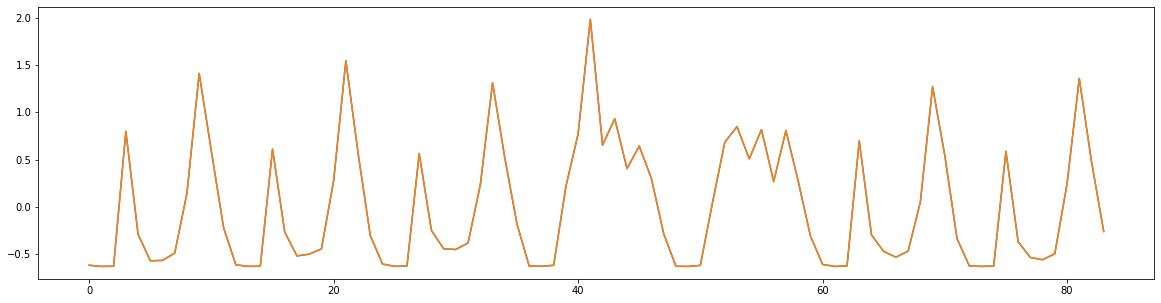

In [36]:
plt.plot(s0)
plt.plot(s00)

## Test Prediction

In [21]:
h = 100

In [77]:
with open('Results/ExpSmo120In.npy','rb') as f:
    prev = np.load(f)

In [90]:
fitted = OGf(alpha,beta,gamma, 1,initial_level,initial_trend,initial_seasons,h,m)

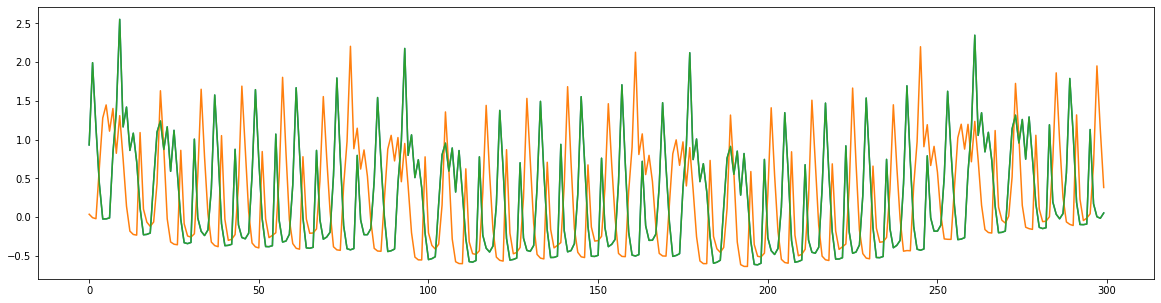

In [119]:
plt.plot(prev[2300:2600])
plt.plot(pp[2300:2600])
plt.plot(fitted[2300:2600])

In [7]:
with open('Results/expsmootPred100.npy','rb') as f:
    xx = np.load(f)

In [60]:
pred, s, b, c = predFeature(x,100,m,alpha,0,gamma,x[0], b0,s0)
pred = pred[-h:]

In [71]:
s,b

(0.6941378534097052, 0.0)

In [69]:
# predNoPre = predFeatureNoPre(50,150,m,s,b,c)
predNoPre = predFeatureNoPre(53,153,m,s,0,s0)

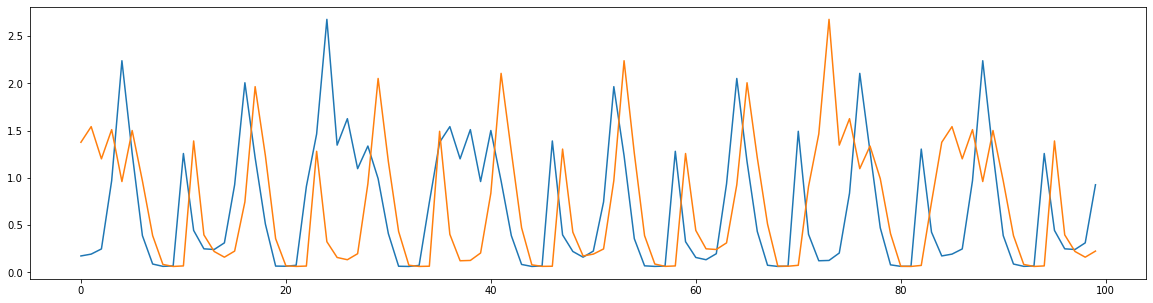

In [70]:
# plt.plot(fitted[-h:])
# plt.plot(xx)
plt.plot(pred)
plt.plot(predNoPre)